<h2><center>PPOL564 Final Project Presentation<br><br><h2> <h2><center>By: David Lopez<br><br><h2>

# The Problem and Background




### Current state of methane emissions

- Agriculture one of the largest emitters nationally and globally

- Unsustainable in the long run due to harmfulness of methane gas



### Promising research

- Red seaweed (*Asparagopsis taxiformis*) introduced to feed of cows

- Not possible on a commercial level

  

## The Data

- Experiment data

- Outcome of interest

- Explanatory variables

## Methods Considered

- Permutation importance

- Partial dependency plots

- Incorporate time series/panel data aspect further

## Methods Used

- Pandas to create main dataframe, manipulate existing variables and create new ones

    - Diet: Low, Medium, High Forage, DMI
    
    - Size: initial vs final body weight, average daily mass gain
    
    - Treatment: low dose, high dose
    
    - Outcome: log methane emissions
    
- Two pipelines to evaluate predictiveness

- Fit algorithms with two groups of variables

In [604]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt


# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")


In [566]:
GasData = pd.read_csv('/Users/davidlopez/Desktop/PPOL564/Project/GasData.csv')

ProductionData = pd.read_csv('/Users/davidlopez/Desktop/PPOL564/Project/ProductionData.csv')


In [567]:
GasData['Diet'] = ProductionData['Diet']
GasData['Dry_Matter_Intake'] = ProductionData['Dry_Matter_Intake']
GasData['Initial_Body_Weight'] = ProductionData['Initial_Body_Weight']
GasData['Final_Body_Weight'] = ProductionData['Final_Body_Weight']
GasData['Total_Gain'] = ProductionData['Total_Gain']
GasData['Average_Daily_Gain'] = ProductionData['Average_Daily_Gain']
GasData['Feed_Conversion_Efficiency'] = ProductionData['Feed_Conversion_Efficiency']
GasData['Cost_per_Gain'] = ProductionData['Cost_per_Gain']

TreatmentData = GasData

In [568]:

TreatmentData = TreatmentData.sort_values('Animal_ID')

TreatmentData = TreatmentData.dropna()

In [569]:
# Convert categorical objects into categories

for col in ['Treatment', 'Diet']:
    TreatmentData[col] = TreatmentData[col].astype('category')
    

TreatmentData.dtypes

Treatment                     category
Diet                          category
Animal_ID                        int64
Experimental_Week                int64
CO2_Production                 float64
CO2_Yield                      float64
CH4_Production                 float64
CH4_Yield                      float64
H2_Production                  float64
H2_Yield                       float64
Dry_Matter_Intake              float64
Initial_Body_Weight            float64
Final_Body_Weight              float64
Total_Gain                     float64
Average_Daily_Gain             float64
Feed_Conversion_Efficiency     float64
Cost_per_Gain                  float64
dtype: object

In [570]:
TreatmentData['Received_Seaweed'] = TreatmentData["Treatment"].replace('High Dose ',1)
TreatmentData['Received_Seaweed'] = TreatmentData["Received_Seaweed"].replace('Low Dose ',1)
TreatmentData['Received_Seaweed'] = TreatmentData["Received_Seaweed"].replace('Control ',0)


TreatmentData


,Treatment,Diet,Animal_ID,Experimental_Week,CO2_Production,CO2_Yield,CH4_Production,CH4_Yield,H2_Production,H2_Yield,Dry_Matter_Intake,Initial_Body_Weight,Final_Body_Weight,Total_Gain,Average_Daily_Gain,Feed_Conversion_Efficiency,Cost_per_Gain,Received_Seaweed
21,High Dose,Medium Forage,26,3,6360.67,865.97,32.33,4.40,8.19,1.12,11.16,440.89,452.68,11.79,0.56,0.05,5.88,1
27,High Dose,Medium Forage,26,6,6700.83,719.98,38.67,4.15,8.83,0.95,10.20,440.89,478.09,37.19,1.77,0.17,1.70,1
33,High Dose,Medium Forage,26,9,8275.00,742.36,35.88,3.22,10.21,0.92,12.13,475.36,518.91,43.54,2.07,0.17,1.72,1
28,High Dose,Medium Forage,27,6,6891.17,828.60,150.83,18.14,2.70,0.32,10.61,465.39,496.23,30.84,1.47,0.14,2.14,1
34,High Dose,Medium Forage,27,9,7667.25,780.04,136.63,13.90,3.87,0.39,10.88,462.66,487.16,24.49,1.17,0.11,2.74,1
22,High Dose,Medium Forage,27,3,6340.80,952.32,51.40,7.72,4.90,0.74,11.85,459.94,490.79,30.84,1.47,0.12,2.38,1
0,Control,High Forage,28,3,6620.50,613.41,150.50,13.94,0.50,0.05,11.14,387.37,482.62,95.25,1.51,0.14,2.06,0
7,Control,High Forage,28,6,7924.50,700.55,236.75,20.93,1.38,0.12,7.82,378.30,460.85,82.55,1.31,0.17,1.67,0
14,Control,High Forage,28,9,7270.33,608.28,220.17,18.42,0.95,0.08,10.33,357.43,475.36,117.93,1.87,0.18,1.54,0
8,Control,High Forage,29,6,7833.00,717.37,275.40,25.22,1.71,0.16,8.53,351.99,440.89,88.90,1.41,0.17,1.69,0


In [571]:
treat_dummies = pd.get_dummies(TreatmentData.Treatment)

treat_dummies.columns = [c.lower().replace(" ","_") for c in treat_dummies.columns]

treat_dummies = treat_dummies.drop(['control_'],axis=1) # Baseline

TreatmentData = pd.concat([TreatmentData.drop(['Treatment'],axis=1),treat_dummies],axis=1)



In [572]:
TreatmentData['high_dose'] = TreatmentData['high_dose_']
TreatmentData['low_dose'] = TreatmentData['low_dose_']

TreatmentData = TreatmentData.drop(columns = ['high_dose_', 'low_dose_'])


In [573]:
diet_dummies = pd.get_dummies(TreatmentData.Diet)

diet_dummies.columns = [c.lower().replace(" ","_") for c in diet_dummies.columns]

diet_dummies = diet_dummies.drop(['low_forage_'],axis=1) # Baseline

TreatmentData = pd.concat([TreatmentData.drop(['Diet'],axis=1),diet_dummies],axis=1)


In [574]:
TreatmentData['ln_CH4_Production'] = np.log(TreatmentData['CH4_Production'])

TreatmentData['ln_CO2_Production'] = np.log(TreatmentData['CO2_Production'])


TreatmentData.head()

,Animal_ID,Experimental_Week,CO2_Production,CO2_Yield,CH4_Production,CH4_Yield,H2_Production,H2_Yield,Dry_Matter_Intake,Initial_Body_Weight,...,Average_Daily_Gain,Feed_Conversion_Efficiency,Cost_per_Gain,Received_Seaweed,high_dose,low_dose,high_forage,medium_forage,ln_CH4_Production,ln_CO2_Production
21,26,3,6360.67,865.97,32.33,4.40,8.19,1.12,11.16,440.89,...,0.56,0.05,5.88,1,1,0,0,1,3.475996,8.757889
27,26,6,6700.83,719.98,38.67,4.15,8.83,0.95,10.20,440.89,...,1.77,0.17,1.70,1,1,0,0,1,3.655064,8.809987
33,26,9,8275.00,742.36,35.88,3.22,10.21,0.92,12.13,475.36,...,2.07,0.17,1.72,1,1,0,0,1,3.580180,9.020994
28,27,6,6891.17,828.60,150.83,18.14,2.70,0.32,10.61,465.39,...,1.47,0.14,2.14,1,1,0,0,1,5.016153,8.837996
34,27,9,7667.25,780.04,136.63,13.90,3.87,0.39,10.88,462.66,...,1.17,0.11,2.74,1,1,0,0,1,4.917277,8.944713


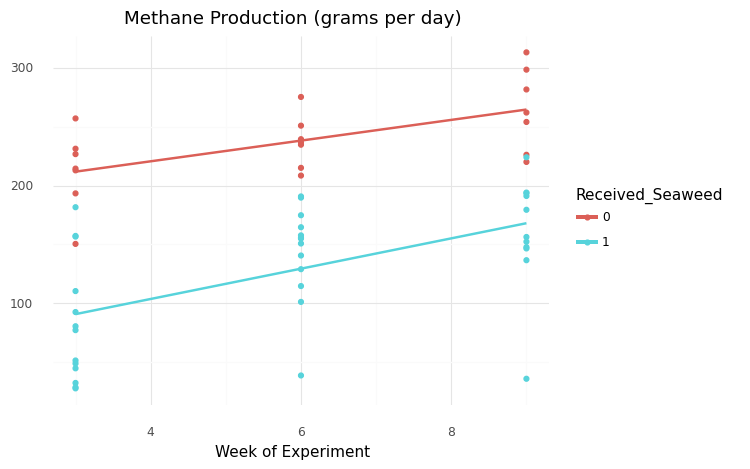

<ggplot: (308828453)>

In [609]:
(ggplot(aes(x = 'Experimental_Week', y = 'CH4_Production', color = 'Received_Seaweed'), TreatmentData) 
 + geom_point()
 + geom_smooth(method = 'lm', se = False)
 + theme_minimal()
 + ggtitle('Methane Production (grams per day)')
 + ylab('')
 + xlab('Week of Experiment'))

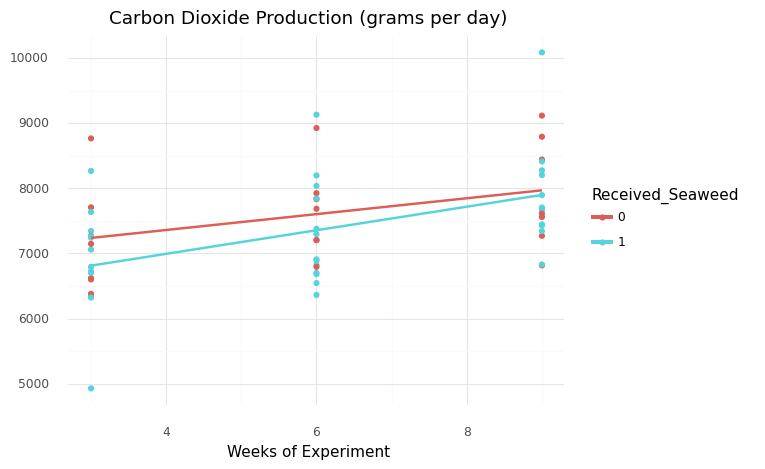

<ggplot: (302137013)>

In [621]:
(ggplot(aes(x = 'Experimental_Week', y = 'CO2_Production', color = 'Received_Seaweed'), TreatmentData) 
 + geom_point()
 + geom_smooth(method = 'lm', se = False)
 + ggtitle('Carbon Dioxide Production (grams per day)')
 + ylab('')
 + xlab('Weeks of Experiment')
 + theme_minimal())

In [499]:
TreatmentData.iloc[0]

Animal_ID                       26.000000
Experimental_Week                3.000000
CO2_Production                6360.670000
CO2_Yield                      865.970000
CH4_Production                  32.330000
CH4_Yield                        4.400000
H2_Production                    8.190000
H2_Yield                         1.120000
Dry_Matter_Intake               11.160000
Initial_Body_Weight            440.890000
Final_Body_Weight              452.680000
Total_Gain                      11.790000
Average_Daily_Gain               0.560000
Feed_Conversion_Efficiency       0.050000
Cost_per_Gain                    5.880000
Received_Seaweed                 1.000000
high_dose                        1.000000
low_dose                         0.000000
high_forage                      0.000000
medium_forage                    1.000000
ln_CH4_Production                3.475996
ln_CO2_Production                8.757889
Name: 21, dtype: float64

In [577]:
y = TreatmentData['ln_CH4_Production']

X = TreatmentData[['Dry_Matter_Intake', 'Initial_Body_Weight', 'Final_Body_Weight', 'high_dose', 'low_dose', 'high_forage', 'medium_forage']]





In [578]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=2000)

In [579]:
train_X.shape

(43, 7)

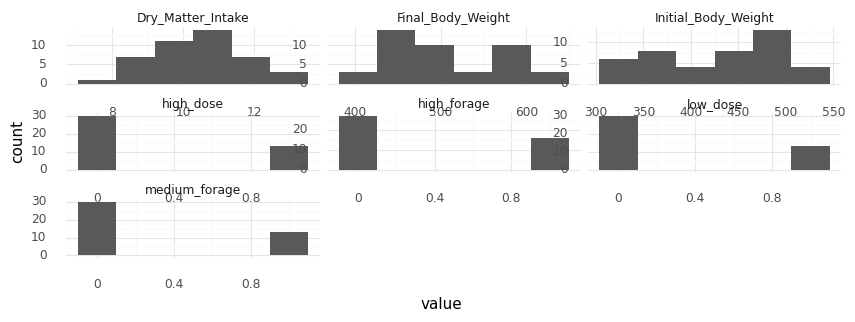

<ggplot: (309444395)>

In [580]:
(
    ggplot(train_X.melt(),aes(x="value")) +
    geom_histogram() +
    facet_wrap("variable",scales="free") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
) 

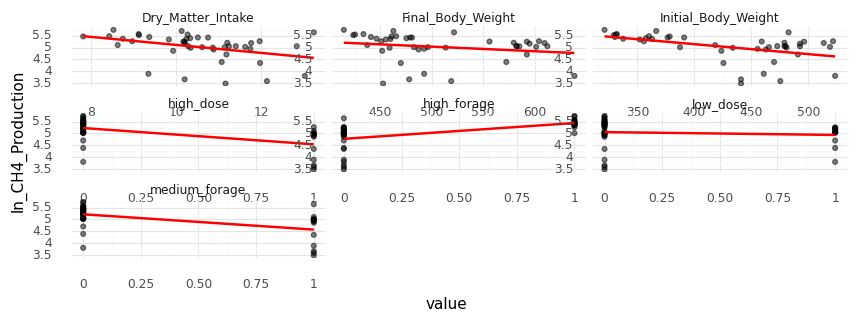

<ggplot: (300878436)>

In [581]:
D = train_X.copy()
D['ln_CH4_Production'] = train_y

(
    ggplot(D.melt(id_vars=["ln_CH4_Production"]),
           aes(x="value",y="ln_CH4_Production"))+
    geom_point(alpha=.5) +
    facet_wrap("variable",scales="free") +
    geom_smooth(method="lm",se=False,color="red") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
)

In [582]:
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [583]:
train_X = pd.DataFrame(train_X,columns=col_names)

In [584]:


# (0) Split the data 
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=2000)

# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['Dry_Matter_Intake', 'Initial_Body_Weight', 
                                                                         'Final_Body_Weight',
                                                                         'high_forage', 'medium_forage'])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]




In [585]:
# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

In [586]:
# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Dry_Matter_Intake',
                                                                          'Initial_Body_Weight',
                                                                          'Final_Body_Weight',
                                                                          'high_dose',
                                                                          'low_dose',
                                                                          'high_forage',
                                                                          'medium_forage'])])),
                                       ('model', None)]),
      

### Results from model using diet and size variables

In [587]:
search.best_score_ # Mean out-of-sample (CV) error

-0.4295520082211139

In [588]:
search.best_params_


{'model': LinearRegression()}

In [589]:
pred_y = search.predict(test_X)


In [590]:
m.mean_squared_error(test_y,pred_y)


0.19988197015173093

In [591]:
m.r2_score(test_y,pred_y)


0.6254152629293515

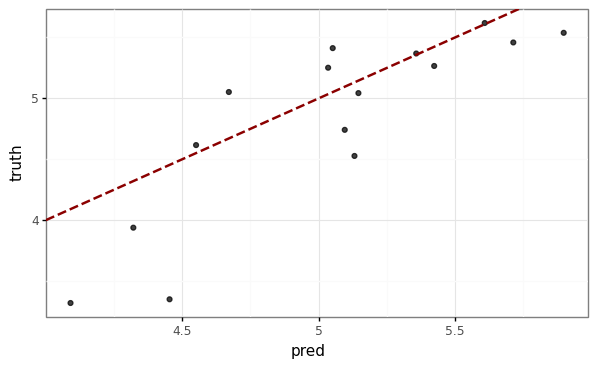

<ggplot: (309005984)>

In [612]:
(ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(7,4)))

In [598]:
!pip3 install RISE

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [613]:


# (0) Split the data 
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=2000)

# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['low_dose', 'high_dose'])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]




In [614]:
# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

In [615]:
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['low_dose',
                                                                          'high_dose'])])),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [10, 15, 20, 25, 30]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [1, 2, 3, 5]},
                         {'model': [BaggingRegressor()]},
                         {'model': [RandomForestClassifier()],
               

In [616]:
search.best_score_ # Mean out-of-sample (CV) error

-0.228706598384679

In [617]:
search.best_params_


{'model': LinearRegression()}

In [618]:
pred_y = search.predict(test_X)

m.mean_squared_error(test_y,pred_y)



0.2813778515345509

## Results from treatment variables

In [619]:
m.r2_score(test_y,pred_y)

0.47268956547424246

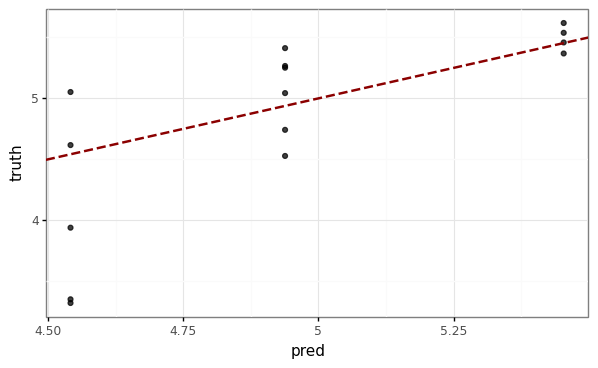

<ggplot: (309449250)>

In [620]:
(ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(7,4)))

## Lessons Learned


- Model with diet and size variables predicted outcome (log Methane Emissions) performed better, but not convinced

- May explore different predictive models better suited for small sample size

- Panel data presents problems of autocorrelation, increases variance

- Expand on external validity of experiment 


<h2><center>Thanks for watching!<center><br><br><h2>